# Neural Network (nn)

[Edward Lu](https://github.com/edwardlu71/notebooks)

### Convolutional Neural Network

- a class of deep neural network
- each neuron in one layer is connected to all neurons in the next layer, multilayer perceptrons
- multiple hidden layers, the hidden layers of a CNN typically consist of a series of convolutional layers that convolve with a multiplication or other dot product.
- activation function is commonly a RELU layer



## Standard example of handwritten digits recognition (MNIST)

[example](https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d)

In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from time import time, sleep
import os
from random import randint

In [2]:
# Hyper-parameters
#
# 28x28 size pixel of an image for input
input_size = 784
# size of middle layers
hidden_size = 500
# output size, characters of 0-9
num_classes = 10

# training parameters
num_epochs = 3
batch_size = 100
learning_rate = 0.001

In [3]:
# data source
#
# load the data from MNIST dataset to local disk
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
# Data loader len(train_loader) = 600, so total 600x100 images
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100.1%

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


113.5%

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


100.4%

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


180.4%/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [4]:
data_iter = iter(test_loader)

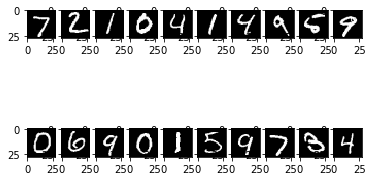

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [5]:
# example_data.size() = torch.Size([100, 1, 28, 28]). It's 4 dim data of 100 samples, 1 color, 28x28 pixels
# example_data stores 100 samples of image data of 0-9 characters; example_targets stores the 100 actual characters of the images
images, labels = data_iter.next()

# debug: show the first 6 images
for i in range(20):
    plt.subplot(2, 10, i+1) # 2 x 5 subplots
    plt.imshow(images[i][0], cmap='gray')
plt.show()

print(labels.numpy()[:20])


In [6]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

### Training

- trained model is saved in file ./mnist

In [10]:
torch.manual_seed(int(time()))
device = torch.device('cpu')

if os.path.isfile("./mnist"):
    model = torch.load("./mnist", map_location=lambda storage, loc: storage)
    model.eval()
else:
    model = NeuralNet(input_size, hidden_size, num_classes).to(device)

    # define Loss function and choose optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            # loop 600 times, each time with 100 images + labels in a batch.
            #
            # images origin shape: [100, 1, 28, 28]
            # resized: [100, 784] = images is a 100 size batch each with 784 inputs for one image
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # Forward pass
            #
            # outputs with shape [100, 10] for the result of 100 size batch, each with output of possibility on 0-9 charactors
            outputs = model(images)
            # how likely the predicted in output matches real characters in labels. loss is only one figure as result of a 100 size batch training
            loss = criterion(outputs, labels)

            # Backward and optimize
            #
            # cleanup the history first
            optimizer.zero_grad()
            # dLoss/dWeights
            loss.backward()
            # adjust weights from dLoss/dWeights
            optimizer.step()

            if i % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i}/{n_total_steps}], Loss: {loss.item():.4f}')

    torch.save(model, "mnist")

Epoch [1/3], Step [0/600], Loss: 2.3074
Epoch [1/3], Step [100/600], Loss: 0.2860
Epoch [1/3], Step [200/600], Loss: 0.2090
Epoch [1/3], Step [300/600], Loss: 0.1362
Epoch [1/3], Step [400/600], Loss: 0.1277
Epoch [1/3], Step [500/600], Loss: 0.1242
Epoch [2/3], Step [0/600], Loss: 0.1577
Epoch [2/3], Step [100/600], Loss: 0.0661
Epoch [2/3], Step [200/600], Loss: 0.1856
Epoch [2/3], Step [300/600], Loss: 0.1093
Epoch [2/3], Step [400/600], Loss: 0.0739
Epoch [2/3], Step [500/600], Loss: 0.1091
Epoch [3/3], Step [0/600], Loss: 0.0273
Epoch [3/3], Step [100/600], Loss: 0.1515
Epoch [3/3], Step [200/600], Loss: 0.1505
Epoch [3/3], Step [300/600], Loss: 0.0716
Epoch [3/3], Step [400/600], Loss: 0.0480
Epoch [3/3], Step [500/600], Loss: 0.0419


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type NeuralNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [11]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 97.44 %


label=6 predicted 6


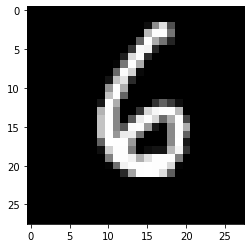

In [15]:
# region debug
data_iter = iter(test_loader)
images, labels = data_iter.next()

images = images.reshape(-1, 28 * 28).to(device)
labels = labels.to(device)
outputs = model(images)
# max returns (value ,index)
_, predicted = torch.max(outputs.data, 1)

images = images.reshape(-1, 28, 28).to(device)
labels_np = labels.numpy()
predicted_np = predicted.numpy()

k = randint(0, 100)
print(f"label={labels_np[k]} predicted {predicted_np[k]}")
plt.imshow(images[k], cmap='gray')
plt.show()
# endregion